In [1]:
# To enable intelli sense in Jupyter notebook
%config IPCompleter.greedy=True
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Load the data

In [3]:
customer_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv").set_index("ID")
customer_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Check the data set for missing values

In [4]:
# checking whether any column has NaN values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [5]:
# checking count of zeros in all the columns to check for missing values
customer_df[customer_df == 0].count()

Age                      0
Experience              66
Income                   0
ZIP Code                 0
Family                   0
CCAvg                  106
Education                0
Mortgage              3462
Personal Loan         4520
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
dtype: int64

- There seems to be no missing value in the dataset.
- The columns Experience, CCAvg and Mortgage can have zero values.

## Study the data distribution in each attribute and share your findings.

In [6]:
customer_df.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Observation:**
- ZIP Code column is currently in numerical format and needs to be converted to categorical format.
- Few columns like Personal Loan, Securities Account, CD Account, Online, CreditCard have values 0 and 1 only. And few columns like Income and Mortgage have comparitively higher ranges thus dominating the other columns. Hence, scaling is needed to improve model performance.
- Comparing the mean and median values, it seems there are outliers in the columns Income, CCAvg and Mortgage. Need to use boxplot to confirm.

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


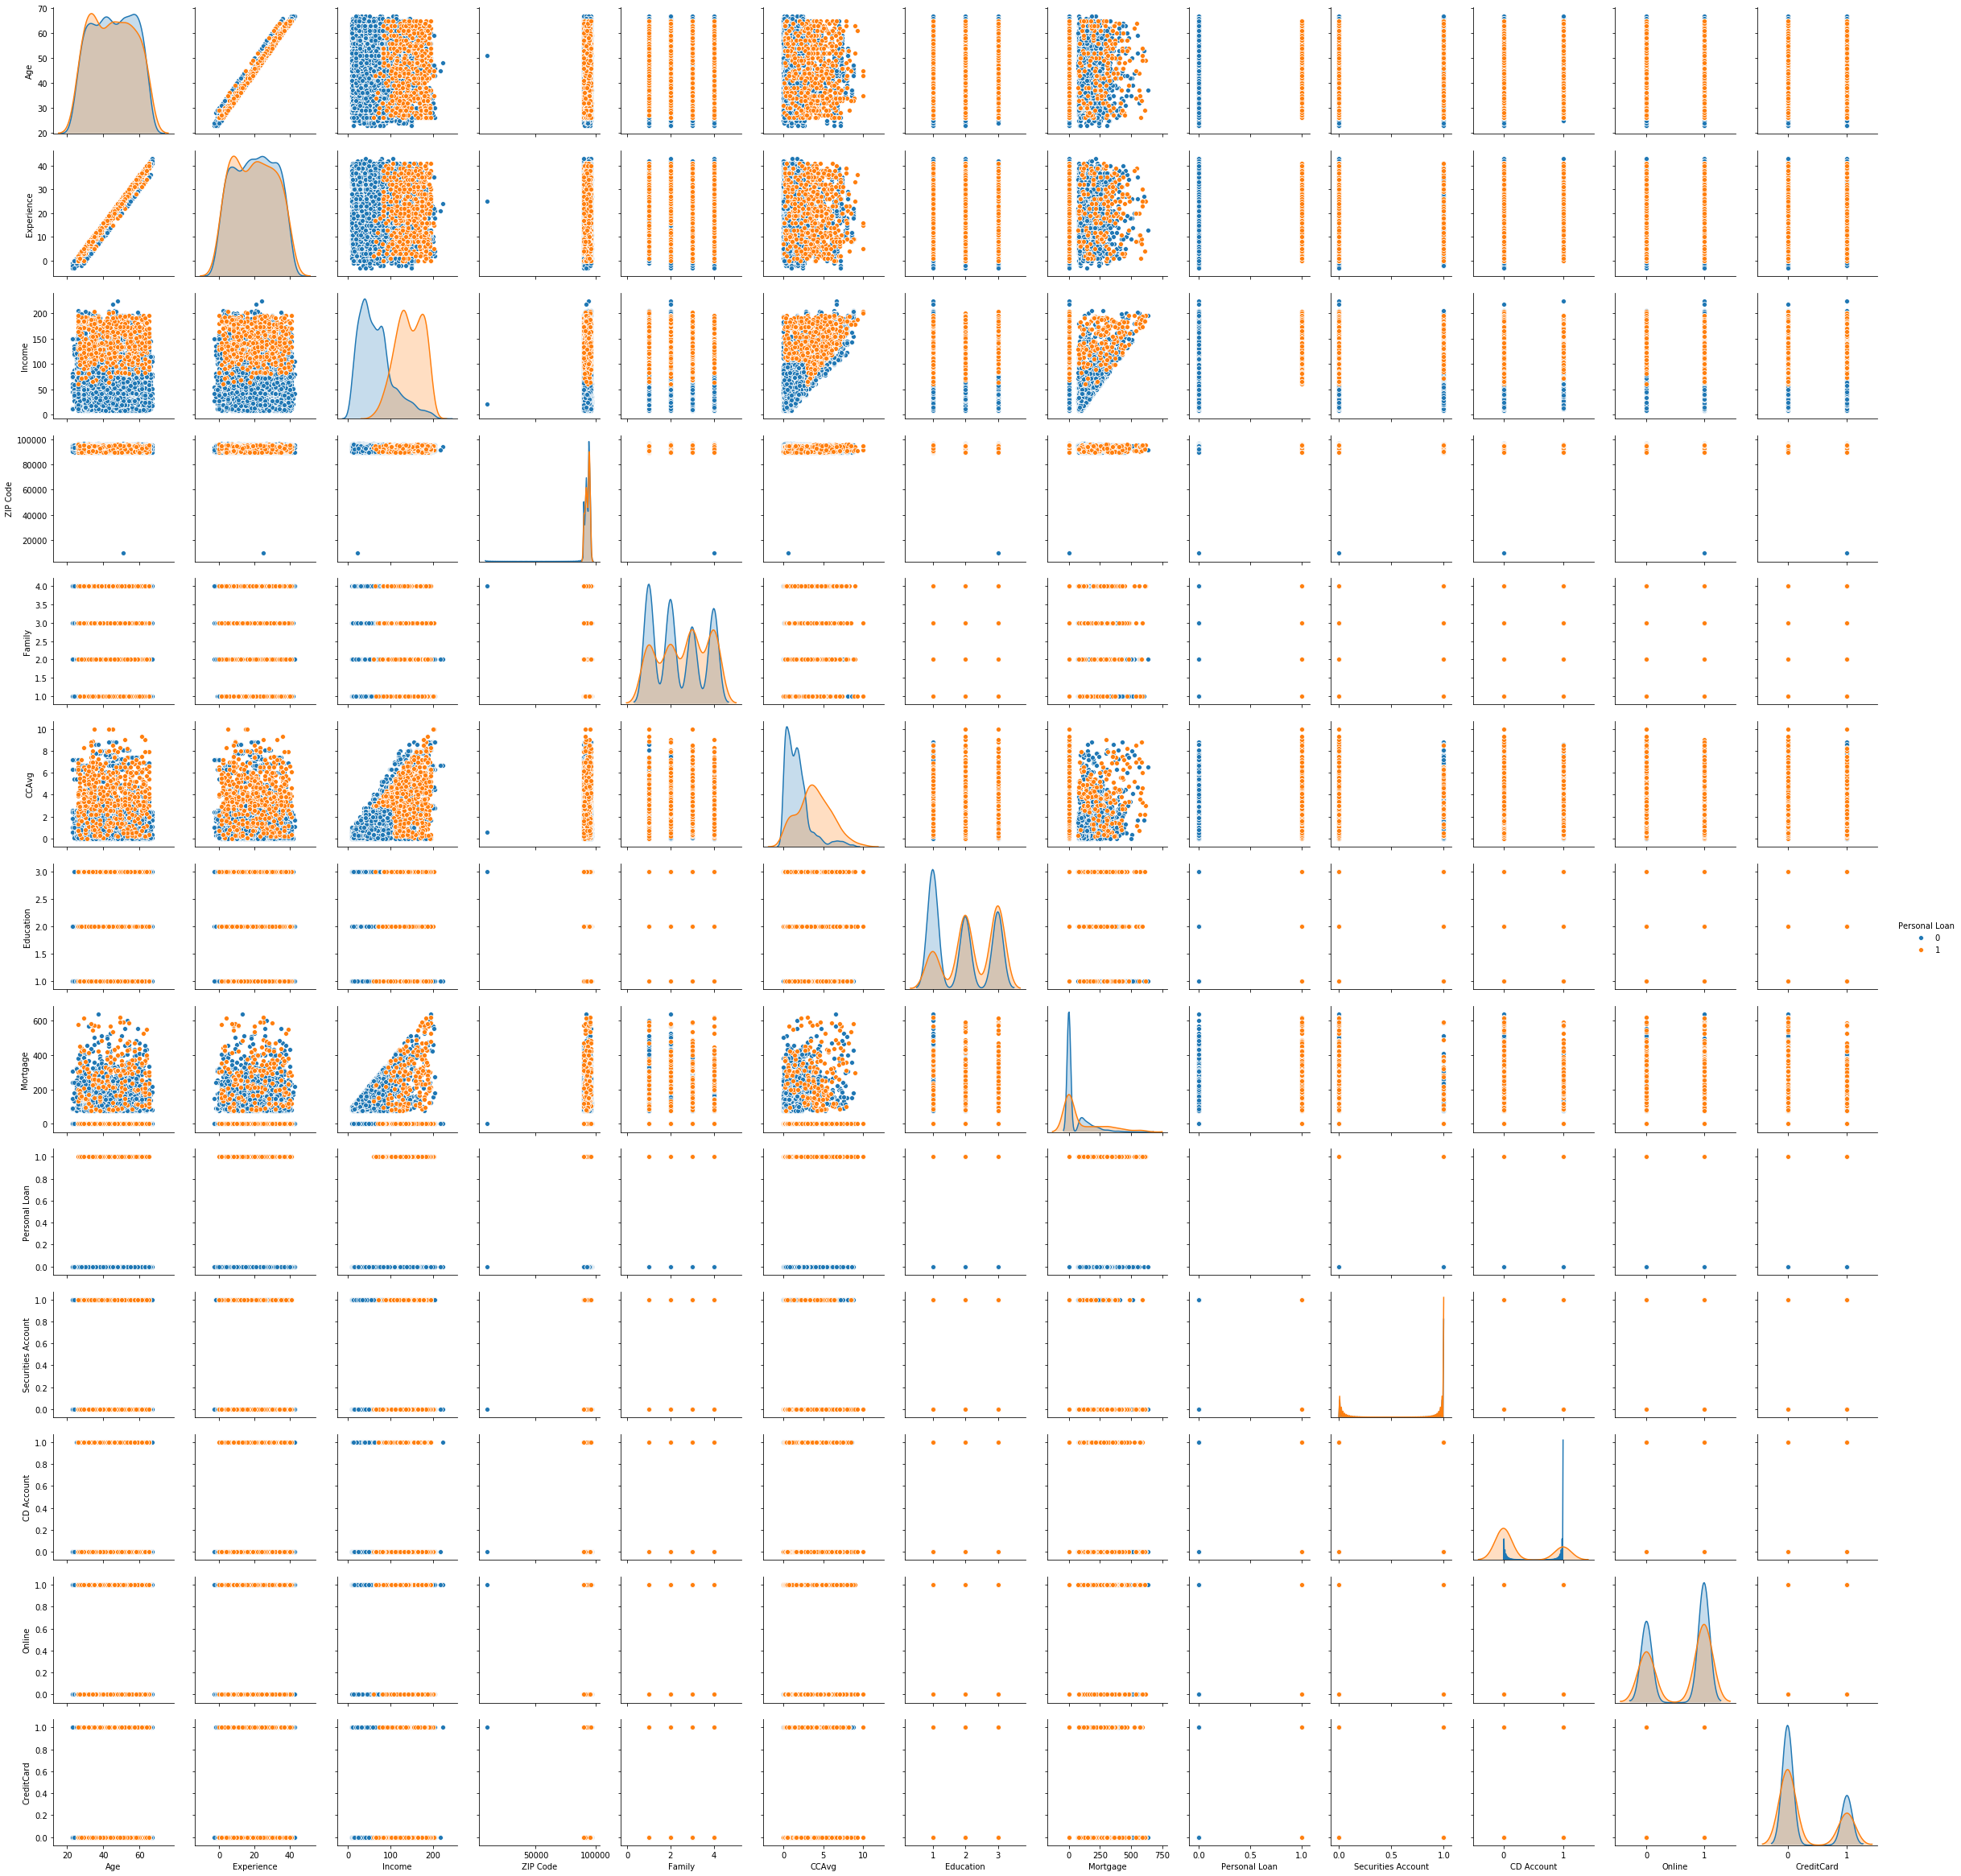

In [7]:
sns.pairplot(data=customer_df, hue="Personal Loan")

Observation:
- There is a string linear relationship between Age and Experience.
- The column Mortagage is highly skewed, where as Income and CCAvg is slightly skewed.
- There doesnt seem to be any column which can alone predict the column Personal Loan

## Feature Engineering

**Feature Name**: Age

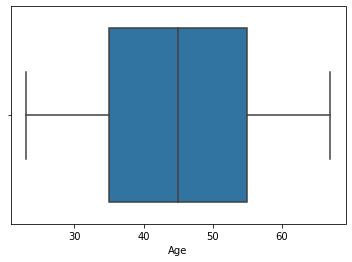

In [8]:
sns.boxplot(customer_df["Age"])

**Observation**:
- From the statistics table, it is found that the range of Age column is higher compared to few columns, making it a dominant column over others. This can be taken care by scaling later.
- From the pair plot, it is found that Age column has a fairly normal distribution.
- Also, it does not seem to contribute alone towards predicting the dependent column Personal Loan.
- It has a strong correlation with Experience column.
- From the above box plot, it is found that Age column does not have any outlier.

**Feature Name**: Experience

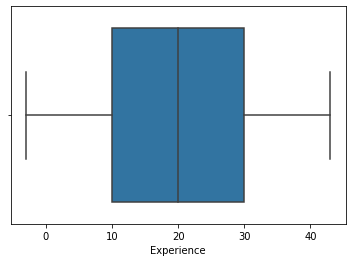

In [9]:
sns.boxplot(customer_df["Experience"])

**Observation**:

- From the statistics table, it is found that the range of Experience column is higher compared to few columns, making it a dominant column over others. This can be taken care by scaling later.
- Also, Experience column has few values as negative which is seems to be wrong. This needs to be taken care either by droppiing the column or by using log transformation.
- From the pair plot, it is found that Experience column has a fairly normal distribution.
- Also, it does not seem to contribute alone towards predicting the dependent column Personal Loan.
- It has a strong correlation with Age column.
- From the above box plot, it is found that Experience column does not have any outlier.

In [10]:
# Handling negative values in Experience column. Using log transformation skews the data distribution.
#a = 4
#customer_df["Experience"] = np.log(customer_df["Experience"] + a)

# Hence dropping the rows with negative values.
row_index_to_be_dropped = list(customer_df[customer_df["Experience"] < 0].index)
customer_df.drop(row_index_to_be_dropped, axis="index",inplace=True)
print("No. of records left: " + str(5000 - customer_df.shape[0]))

No. of records left: 52


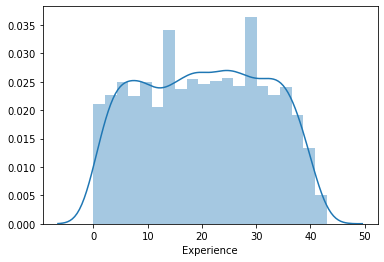

In [11]:
# Checking the distribution after dropping the negative values
sns.distplot(customer_df["Experience"], kde=True)

**Feature Name**: Income

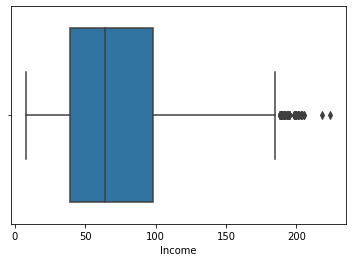

In [12]:
sns.boxplot(customer_df["Income"])

In [13]:
sc.stats.skew(customer_df["Income"])

0.8417486515919316

**Observation**:

- From the statistics table, it is found that the range of Income column is higher compared to few columns, making it a dominant column over others. This can be taken care by scaling later.
- Also, from the Mean and Median values in the statistics table and the box plot, we can find that there are few outlier values. Sinc, the number of outliers is not very high, we can cap those values.
- From the pair plot and the skewness value, it is found that Income column distribution is slightly skewed.
- Also, it does not seem to contribute alone towards predicting the dependent column Personal Loan.
- From the pair plot, we can see that it has no correlation with any other column.

In [14]:
# Capping outliers in Income column
upper_lim = customer_df["Income"].quantile(.95)
customer_df["Income"][customer_df["Income"] > upper_lim] = upper_lim

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


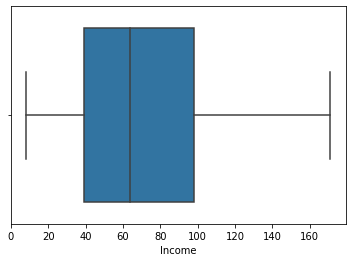

In [15]:
# Visualising the Income column after capping outliers
sns.boxplot(customer_df["Income"])

In [16]:
# Using cube root transformation to reduce skewness of the column
customer_df["Income"] = np.cbrt(customer_df["Income"])

In [17]:
sc.stats.skew(customer_df["Income"])

-0.020265745641056033

The skewness of the column Income is now highly reduced.

**Feature Name**: Zip Code

**Observation**:
- Zip Code is a categorical column. Hence we need to apply Label Encoding to make it compatible with ML Models.
- Zip Code alone doesnt seem to be able to predict the column Personal Loan.
- Zip Code does'nt seem to have any correlation with any other column.

In [18]:
# Converting Zip Code column from Numerical to Categorical
le = LabelEncoder()
customer_df["ZIP Code"] = le.fit_transform(customer_df["ZIP Code"])

**Feature Name**: Family

In [19]:
sc.stats.skew(customer_df["Family"])

0.15955018923157158

**Observation**:
- From the pair plot and skewness measure, it is found that Family is a multi-modal column with a farly normal distribution.
Hence no transformation activity needed.

**Feature Name**: CCAvg

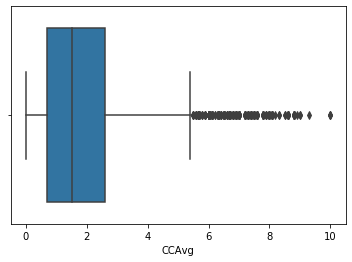

In [20]:
sns.boxplot(customer_df["CCAvg"])

In [21]:
upper_lim = customer_df["CCAvg"].quantile(.95)
print("Total number of outliers: " + str(customer_df["CCAvg"][customer_df["CCAvg"] > upper_lim].shape[0]))

Total number of outliers: 236


In [22]:
sc.stats.skew(customer_df["CCAvg"])

1.5941400754690627

**Observation**:
- From the statistics table and box plot, we can find that there are outliers in the column CCAvg.
- Also, from the pair plot, box plot and skewness measurement, we find that CCAvg column is highly skewed.
- From the pair plot, we find that CCAvg alone cannot predict the column Personal Loan.
- Also, from the pair plot, we find that CCAvg does not have a linear relationship with any other column.

In [23]:
# Performing log transformation on CCAvg column to handle both outliers and skewed distribution.
# Since CCAvg column has zero values, need to add a constant value to handle log opeartions.
a = 1
customer_df["CCAvg"] = np.log(customer_df["CCAvg"] + a)

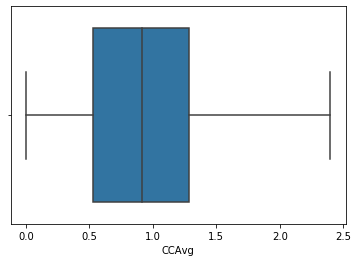

In [24]:
# Visualising the presence of any more outliers in the CCAvg data.
sns.boxplot(customer_df["CCAvg"])

From the above boxplot, we can see that al outliers have been handled.

In [25]:
sc.stats.skew(customer_df["CCAvg"])

0.31902514189153763

From the above skewness measure, we can see that the skewness has reduced a great deal.

**Feature Name**: Education

In [26]:
sc.stats.skew(customer_df["Education"])

0.23102881141192605

**Observation**:
- From the pair plot and skewness measure, it is found that Education is a multi-modal column with a farly normal distribution. Hence no transformation activity needed.

**Feature Name**: Mortgage

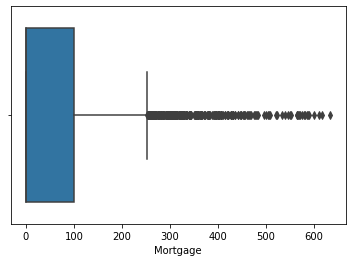

In [27]:
sns.boxplot(customer_df["Mortgage"])

In [28]:
sc.stats.skew(customer_df["Mortgage"])

2.103947346760846

**Observation**:
- From the statistics table, it is found that the range of Mortgage column is high compared to few columns, making it a dominant column over others. This can be taken care by scaling later.
- From the box plot and mean and median columns of the statistics table, it is found that there are too many outliers in mortgage column.
- From the pair plot, box plot and skewness measure, it is found that Mortgage column has a highly skewed distribution and needs to be handled.
- Also, it does not seem to contribute alone towards predicting the dependent column Personal Loan.
- From the pair plot, we can say that Mortgage has no correlation with any other column.

In [29]:
# Performing log transformation to handle both outliers and skewness of the distribution
# Since Mortgage has lot of zero values, need to add a constant to handle log transformarion issues
a = 1
customer_df["Mortgage"] = np.log(customer_df["Mortgage"]+a)

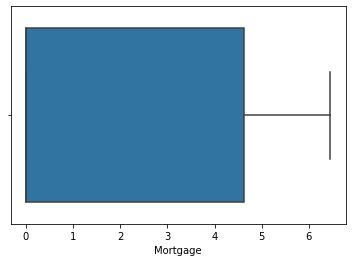

In [30]:
# Visualising if any outlier is left
sns.boxplot(customer_df["Mortgage"])

In [31]:
sc.stats.skew(customer_df["Mortgage"])

0.8723427919391297

- From the above box plot, we find that the outliers have been handled completely.
- From the skewness measure, we find that although the distribution is still skewed, but it has greatly reduced than previously.

**Feature Name**: Securities Account, CD Account, Online, Credit Card

**Observation**:
- From the pair plot, all 4 four coulmns are bimodal distribution.
- From the pair plot, we can find that none alone can predict Personal Loan.

In [32]:
customer_df.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4948.0,45.557195,11.320735,24.0,36.000000,46.000000,55.000000,67.000000
Experience,4948.0,20.331043,11.311973,0.0,10.750000,20.000000,30.000000,43.000000
Income,4948.0,3.999128,0.874947,2.0,3.391211,4.000000,4.610436,5.550499
ZIP Code,4948.0,239.582660,130.961915,0.0,131.000000,254.000000,352.000000,466.000000
Family,4948.0,2.391471,1.148444,1.0,1.000000,2.000000,3.000000,4.000000
CCAvg,4948.0,0.928333,0.533934,0.0,0.530628,0.916291,1.280934,2.397895
Education,4948.0,1.878941,0.839745,1.0,1.000000,2.000000,3.000000,3.000000
Mortgage,4948.0,1.571002,2.368023,0.0,0.000000,0.000000,4.624973,6.455199
Personal Loan,4948.0,0.097009,0.296000,0.0,0.000000,0.000000,0.000000,1.000000
Securities Account,4948.0,0.104285,0.305660,0.0,0.000000,0.000000,0.000000,1.000000


//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


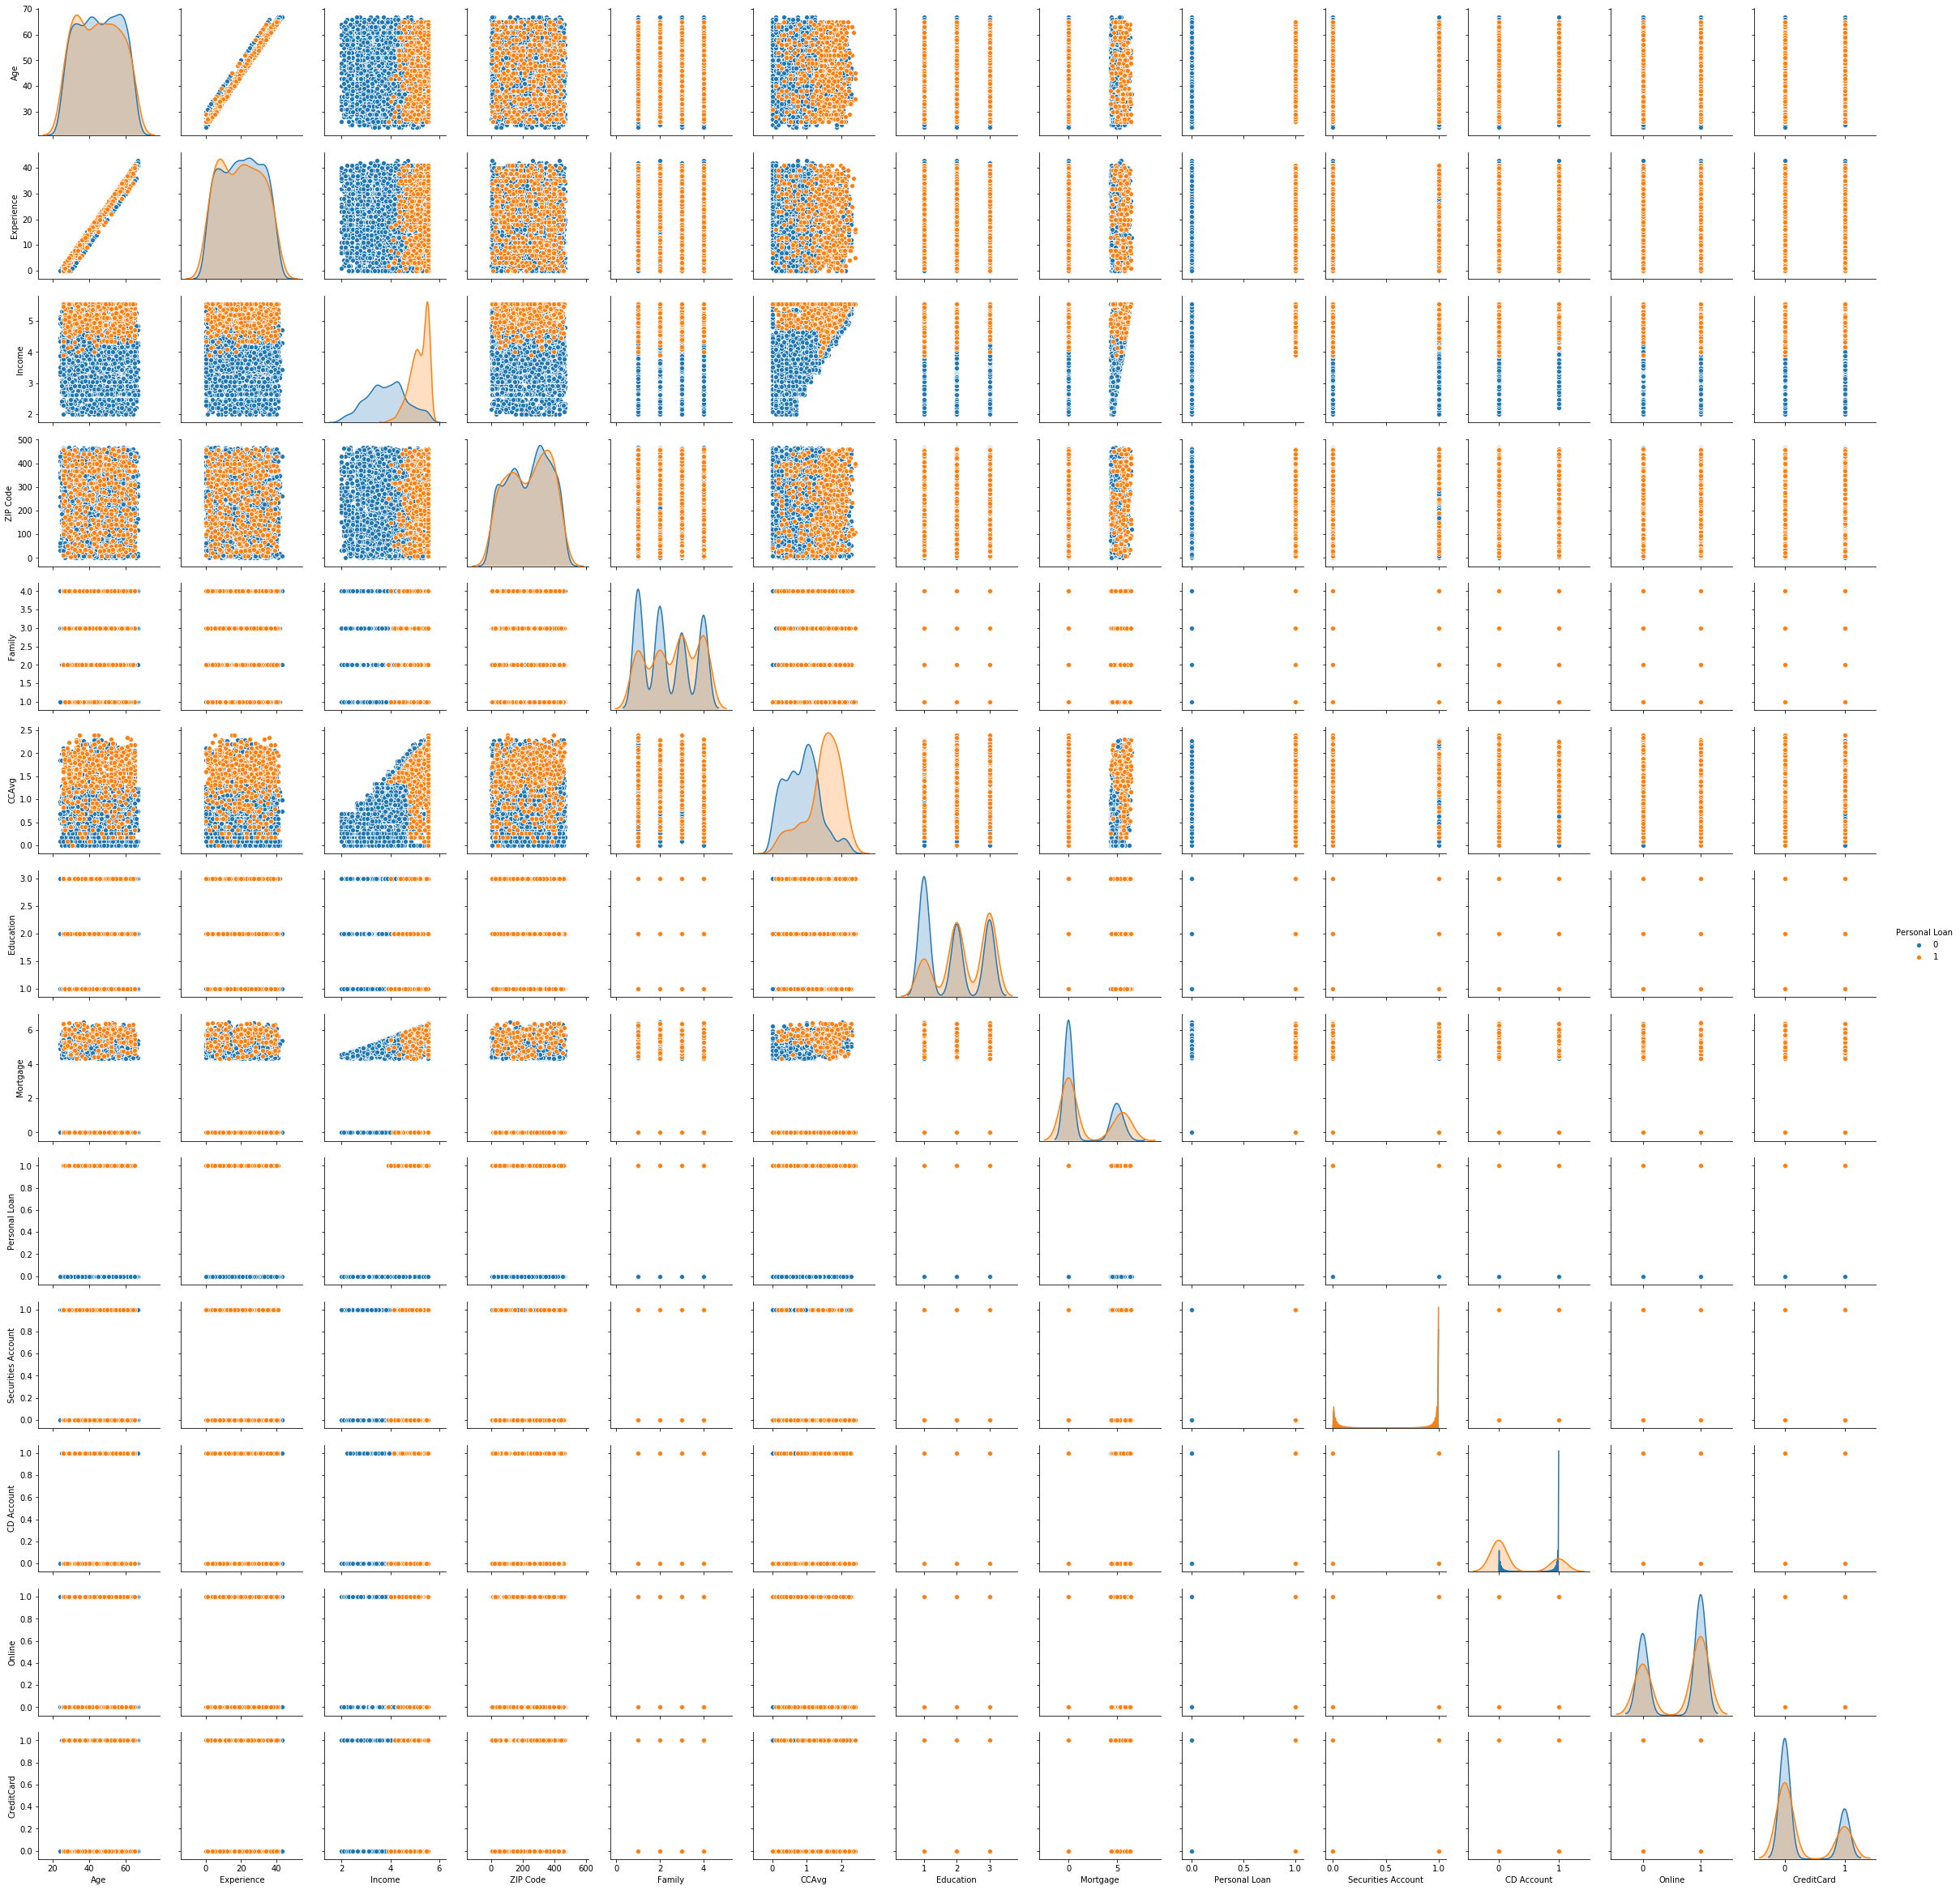

In [33]:
sns.pairplot(data=customer_df, hue="Personal Loan")

## Get the target column distribution

In [34]:
y = customer_df.loc[:,"Personal Loan"]
y.head()

ID
1    0
2    0
3    0
4    0
5    0
Name: Personal Loan, dtype: int64

In [35]:
y.value_counts()

0    4468
1     480
Name: Personal Loan, dtype: int64

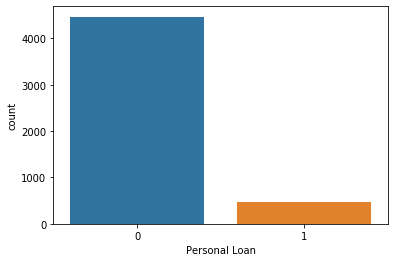

In [36]:
sns.countplot(x=y)

From the above obeservations, it seems the model that will be prepared will be biased towards the 0 class.

In [37]:
X = customer_df.drop("Personal Loan", axis=1)
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,1,3.659306,83,4,0.955511,1,0.0,1,0,0,0
2,45,19,3.239612,34,3,0.916291,1,0.0,1,0,0,0
3,39,15,2.223980,367,1,0.693147,1,0.0,0,0,0,0
4,35,9,4.641589,298,1,1.308333,2,0.0,0,0,0,0
5,35,8,3.556893,96,4,0.693147,2,0.0,0,0,0,1


## Split the data into training and test set in the ratio of 70:30 respectively

In [38]:
X.drop("Age", axis=1, inplace=True)
X.head()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,
1,1,3.659306,83,4,0.955511,1,0.0,1,0,0,0
2,19,3.239612,34,3,0.916291,1,0.0,1,0,0,0
3,15,2.223980,367,1,0.693147,1,0.0,0,0,0,0
4,9,4.641589,298,1,1.308333,2,0.0,0,0,0,0
5,8,3.556893,96,4,0.693147,2,0.0,0,0,0,1


In [39]:
test_size = 0.30
seed = 5
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [40]:
#scaling the features to reduce the effect of dominating features
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

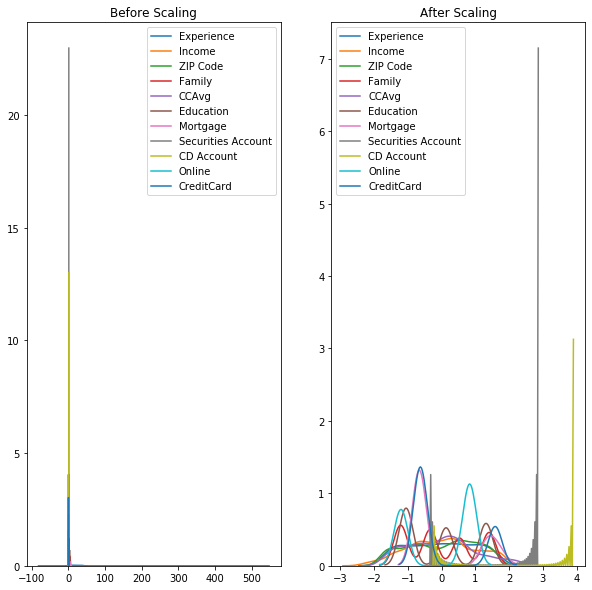

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))

ax1.set_title('Before Scaling')
for col in list(X_train.columns):
    sns.kdeplot(X_train[col], ax=ax1)

ax2.set_title('After Scaling')
for col in list(X_train_scaled_df.columns):
    sns.kdeplot(X_train_scaled_df[col], ax=ax2)

plt.show()

## Logistic Regression Model

In [42]:
model_LRM = LogisticRegression()
model_LRM.fit(X_train_scaled, y_train) #x

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_predict = model_LRM.predict(X_test_scaled) #x
model_LRM_score = model_LRM.score(X_test_scaled, y_test) #x
print(model_LRM_score)

0.9703703703703703


In [44]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1337   16]
 [  28  104]]


In [45]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1353
           1       0.87      0.79      0.83       132

    accuracy                           0.97      1485
   macro avg       0.92      0.89      0.90      1485
weighted avg       0.97      0.97      0.97      1485



## Naive Bayes Model

**Not using scaled data on Naive Bayes**

In [46]:
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train) #x

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
y_predict = model_GNB.predict(X_test) #x
model_GNB_score = model_GNB.score(X_test, y_test) #x
print(model_GNB_score)

0.9252525252525252


In [48]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1292   61]
 [  50   82]]


In [49]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1353
           1       0.57      0.62      0.60       132

    accuracy                           0.93      1485
   macro avg       0.77      0.79      0.78      1485
weighted avg       0.93      0.93      0.93      1485



## KNN Model

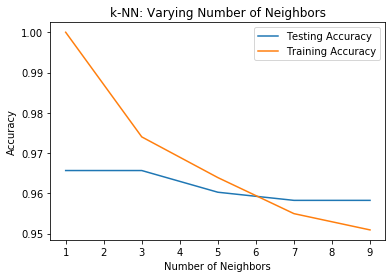

Training accuracy: 
[1.         0.97401097 0.96390413 0.95495235 0.95090962]
Testing accuracy: 
[0.96565657 0.96565657 0.96026936 0.95824916 0.95824916]


In [50]:
neighbors = np.arange(1, 10, 2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train) #x
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(X_train_scaled,y_train) #x
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(X_test_scaled,y_test) #x

# Generate accuracy plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# View the accuracy scores
print("Training accuracy: ")
print(train_accuracy_plot)
print("Testing accuracy: ")
print(test_accuracy_plot)

In [51]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled,y_train) #x
y_predict = model_knn.predict(X_test_scaled) #x
print(model_knn.score(X_test_scaled,y_test)) #x

0.9602693602693603


In [52]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1346    7]
 [  52   80]]


In [53]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1353
           1       0.92      0.61      0.73       132

    accuracy                           0.96      1485
   macro avg       0.94      0.80      0.85      1485
weighted avg       0.96      0.96      0.96      1485



# KNN accuracy : 0.96
# Logistic accuracy : 0.97
# Naive Bayes accuracy : 0.93

# From the above 3 models, it is found that Logistic has the best accuracy score.